In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.simplefilter('ignore')

%config InlineBackend.figure_format = 'svg' 



In [28]:
df = pd.read_csv("insurance.csv")

In [29]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [31]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [32]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.apply(LabelEncoder().fit_transform)

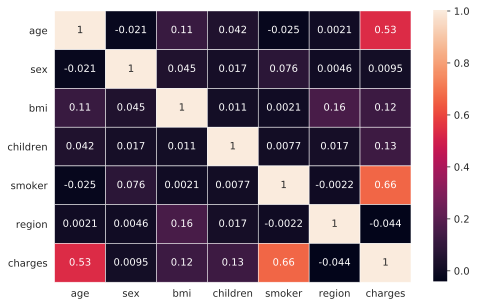

In [33]:
f, ax = plt.subplots(figsize=(8, 5))

sns.heatmap(df_encoded.corr(), annot = True, linewidths=.5)


Text(0, 0.5, 'Charges')

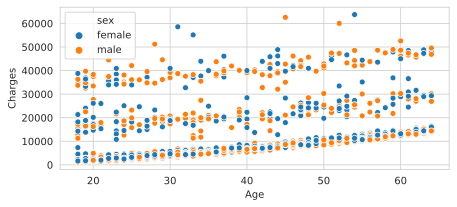

In [34]:
sns.set_style("whitegrid")


plt.figure(figsize = (7,3))
sns.scatterplot(x = "age", y = "charges", data = df, hue = "sex")
plt.xlabel("Age")
plt.ylabel("Charges")

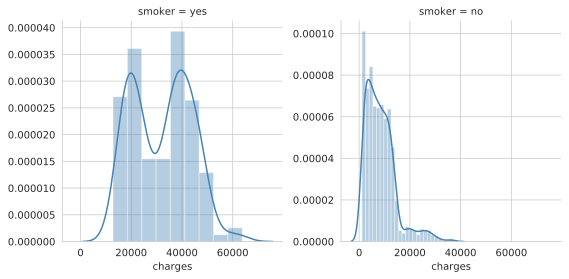

In [35]:
g = sns.FacetGrid(df, col="smoker", sharey=False, size=4)
bins = np.linspace(0, 60, 13)
g.map(sns.distplot, "charges", color="steelblue")


Text(0, 0.5, 'Charges')

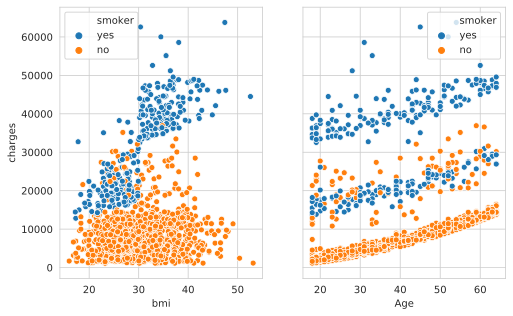

In [36]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(8,5))

sns.scatterplot(x = "bmi", y = "charges", data = df, hue = "smoker",ax=axes[0])
plt.xlabel("bmi")
plt.ylabel("Charges")

sns.scatterplot(x = "age", y = "charges", data = df, hue = "smoker",ax=axes[1])
plt.xlabel("Age")
plt.ylabel("Charges")


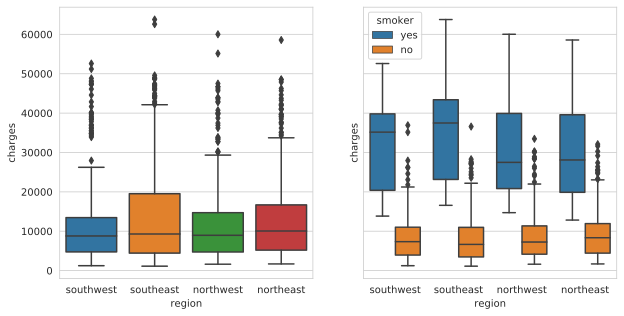

In [38]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10,5))
sns.boxplot(x = "region", y = "charges",data = df,ax=axes[0]);
sns.boxplot(x = "region", y = "charges",hue="smoker",data = df);


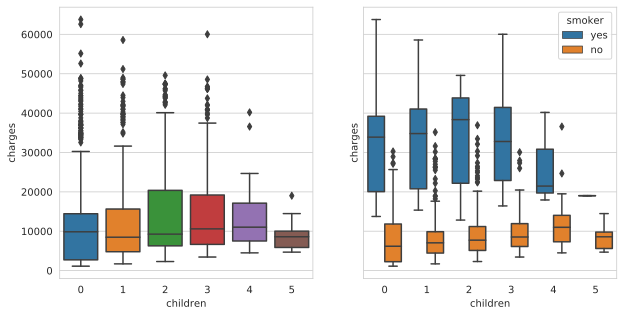

In [12]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10,5))
sns.boxplot(x = "children", y = "charges",data = df,ax=axes[0]);
sns.boxplot(x = "children", y = "charges",hue="smoker",data = df);

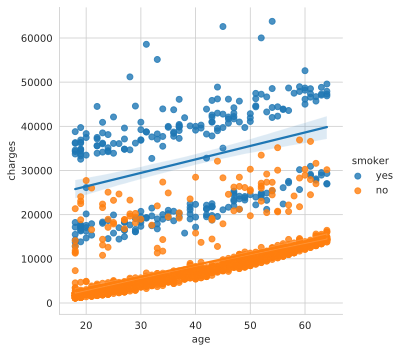

In [13]:
sns.lmplot(data=df,x="age", y="charges", hue="smoker", size=5);
ax.set_title('Smokers and non-smokers');
plt.show()

In [15]:
df = pd.get_dummies(df)
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [16]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['charges'])
y = df['charges']

train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.20,random_state=0)

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_X,train_y)

coefficients = lr.coef_

feature_importance = pd.Series(coefficients,
                               index=train_X.columns).abs().sort_values(ascending = False)
feature_importance

smoker_yes          11802.508634
smoker_no           11802.508634
region_northeast      483.840068
children              436.910121
region_southeast      429.438766
bmi                   335.962814
region_southwest      278.108638
age                   253.700500
region_northwest      223.707336
sex_female              7.731864
sex_male                7.731864
dtype: float64

In [17]:
from sklearn.metrics import r2_score, mean_squared_error

lr_pred_y = lr.predict(test_X)
lr_mse = mean_squared_error(test_y, lr_pred_y)

print('Model mse: {:0.3}, Model Rmse: {:0.3}, Model r2: {:1}'.format(lr_mse, np.math.sqrt(lr_mse),r2_score(test_y,lr_pred_y)))




Model mse: 3.18e+07, Model Rmse: 5.64e+03, Model r2: 0.7999876970680434


In [18]:
from sklearn.model_selection import cross_val_score

lr_cv = cross_val_score(lr, X, y, cv = 7)

print("Accuracy: {:.3} (+/-{:.3})".format(lr_cv.mean(), lr_cv.std() * 2))

Accuracy: 0.745 (+/-0.0786)


In [19]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 10).fit(train_X, train_y)

rf_pred_y = rf.predict(test_X)
rf_mse = mean_squared_error(test_y, rf_pred_y)
print('Model mse: {:0.3}, Model Rmse: {:0.3}, Model r2: {:1}'.format(rf_mse, np.math.sqrt(rf_mse),r2_score(test_y,rf_pred_y)))



Model mse: 2.02e+07, Model Rmse: 4.5e+03, Model r2: 0.8728106969743559


In [20]:
rf_cv = cross_val_score(rf, X, y, cv = 7)

print("Accuracy: {:.3} (+/-{:.3})".format(rf_cv.mean(), lr_cv.std() * 2))

Accuracy: 0.826 (+/-0.0786)


In [21]:
"""from sklearn.model_selection import GridSearchCV

hyperparameters = {'bootstrap': [True,False],
                   "max_depth": [3,5,10,20],
                   "max_features": ['auto', 'sqrt'],
                   "min_samples_leaf": [3,5,7],
                   "min_samples_split": [3,5,8],
                   "n_estimators": [50,100,150,200]
}


grid_search = GridSearchCV(estimator = rf, param_grid = hyperparameters, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(train_X, train_y)"""


'from sklearn.model_selection import GridSearchCV\n\nhyperparameters = {\'bootstrap\': [True,False],\n                   "max_depth": [3,5,10,20],\n                   "max_features": [\'auto\', \'sqrt\'],\n                   "min_samples_leaf": [3,5,7],\n                   "min_samples_split": [3,5,8],\n                   "n_estimators": [50,100,150,200]\n}\n\n\ngrid_search = GridSearchCV(estimator = rf, param_grid = hyperparameters, \n                          cv = 3, n_jobs = -1, verbose = 2)\n\ngrid_search.fit(train_X, train_y)'

In [22]:
"""best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(best_params)
print(best_score)"""

'best_params = grid_search.best_params_\nbest_score = grid_search.best_score_\nprint(best_params)\nprint(best_score)'

In [23]:
best_params={'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}

In [24]:
"""import xgboost 

best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

best_xgb_model.fit(train_X,train_y)

xg_cv = cross_val_score(best_xgb_model, X, y, cv = 7)

print("Accuracy: {:.3} (+/-{:.3})".format(xg_cv.mean(), xg_cv.std() * 2))"""

Accuracy: 0.771 (+/-0.0857)


In [25]:
"""from sklearn.model_selection import GridSearchCV


parameters_for_testing = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
xgb_model = xgboost.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
    min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)
    
gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=1,scoring='neg_mean_squared_error')
gsearch1.fit(train_X,train_y)

print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)"""

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   43.4s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  3.2min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  7.5min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed: 13.5min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 21.7min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed: 32.4min
[Parallel(n_jobs=6)]: Done 2025 out of 2025 | elapsed: 38.4min finished


best params
{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 1.0}
best score
-25703771.334407806


In [20]:
"""import xgboost 
from sklearn.model_selection import cross_val_score

best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.6,
                 gamma=0.5,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=10,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=1,
                 seed=42)

best_xgb_model.fit(train_X,train_y)

xg_cv = cross_val_score(best_xgb_model, X, y, cv = 7)

print("Accuracy: {:.3} (+/-{:.3})".format(xg_cv.mean(), xg_cv.std() * 2))"""

Accuracy: 0.783 (+/-0.0839)


In [21]:
"""from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
parameters_for_testing = {
    'colsample_bytree':[0.4,0.6,0.8],
    'gamma':[0,0.03,0.1,0.3],
    'min_child_weight':[1.5,6,10],
    'learning_rate':[0.1,0.07],
    'max_depth':[3,5],
    'n_estimators':[10000],
    'reg_alpha':[1e-5, 1e-2,  0.75],
    'reg_lambda':[1e-5, 1e-2, 0.45],
    'subsample':[0.6,0.95]  
}
best_xgb_model = xgboost.XGBRegressor()
n_iter_search = 20
random_search = RandomizedSearchCV(best_xgb_model, param_distributions=parameters_for_testing,
                                   n_iter=n_iter_search)
random_search.fit(X, y)"""



NameError: name 'report' is not defined

In [25]:
"""best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.6,
                 gamma=0.1,                 
                 learning_rate=0.07,
                 max_depth=5,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.95,
                 seed=42)

best_xgb_model.fit(train_X,train_y)

xg_cv = cross_val_score(best_xgb_model, X, y, cv = 7)

print("Accuracy: {:.3} (+/-{:.3})".format(xg_cv.mean(), xg_cv.std() * 2))"""

Accuracy: 0.778 (+/-0.103)
